<a href="https://colab.research.google.com/github/Jaavion/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Copy_of_Copy_of_LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [43]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [44]:
import seaborn as sns
sns.__version__

'0.7.1'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-09 20:23:23--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-09 20:23:23 (156 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fix misleading plot #1

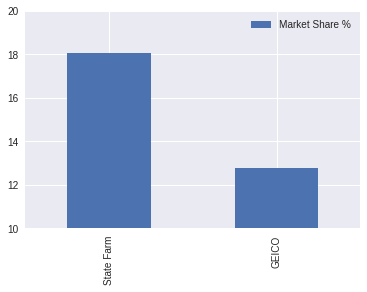

In [0]:
misleading.plot1();

The bar for State Farm ought to appear 1.4 times as tall as the bar for GEICO

In [0]:
18.07 / 12.79

1.4128225175918687

But it appears almost 3 times as tall, in the misleading plot above

In [0]:
(18.07 - 10) / (12.79 - 10)

2.892473118279571

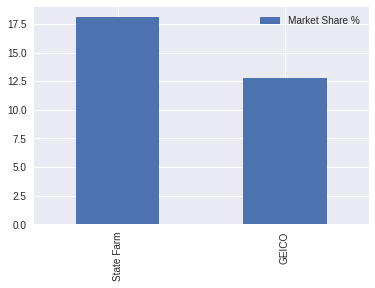

In [0]:
# fix it part 1 - fix the y axis
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar()

In [0]:
# fix it part 2- wheres everyone else?
other = 100 - 18.07 - 12.79
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


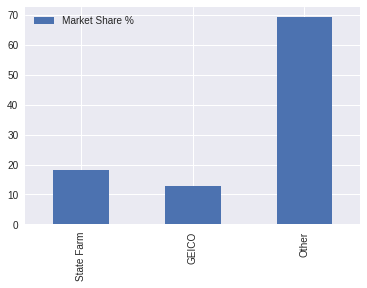

In [0]:
insurance.plot.bar()

### Fix misleading plot #2

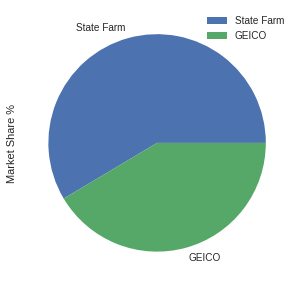

In [0]:
misleading.plot2();

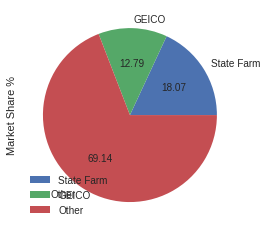

In [0]:
# same as before ! We already have our data so lets see what we get
insurance.plot.pie(y='Market Share %', autopct = '%.2f')

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [0]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
# lets make our dataframe of information

url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [0]:
# lets make a column of normalized data!
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [0]:
import altair as alt
from vega_datasets import data
states = alt.topo_feature(data.us_10m.url, 'states')
pop_eng_hur = data.population_engineers_hurricanes.url
variable = 'population'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'population',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data: 'https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv',
      fields: ['population'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

In [0]:
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### See the data's shape

In [0]:
df.shape

(44, 3)

### See the data

In [0]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [0]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
df_gb = df.groupby('dataset')
df_gb

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [0]:
df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [0]:
df_gb.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

dataset
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

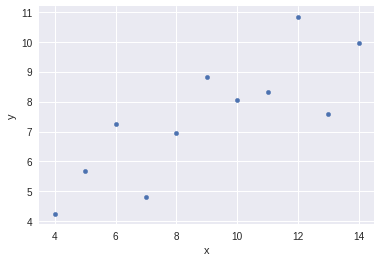

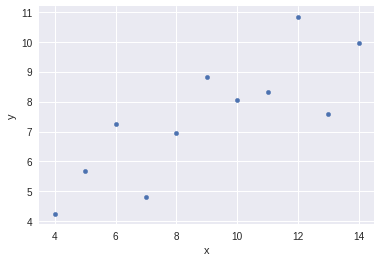

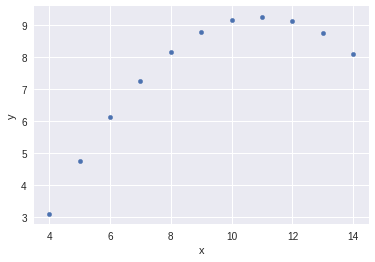

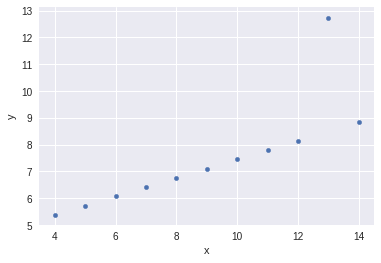

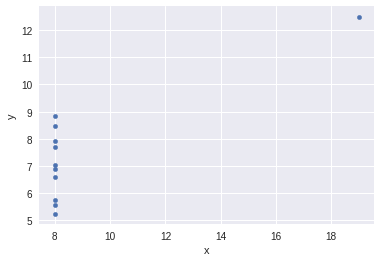

In [0]:
df_gb.plot.scatter(x='x', y='y')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
sns.relplot(x='x', y='y', hue='dataset', col = 'dataset', data = df)

AttributeError: ignored

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [0]:
sns.lmplot(x='x', y='y', col = 'dataset', data=df)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')
tips.head(3)

### See the data's shape

In [0]:
tips.shape

### See the first 5 rows

In [0]:
tips.head()

### Describe the data

In [0]:
tips.describe()

### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [0]:
sns.distplot(a=tips['total_bill'], bins=10)

In [0]:
tips.sex.replace('Male', 0, inplace=True)
tips.sex.replace('Female', 1, inplace=True)


In [0]:
sns.distplot(tips['sex'])

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
sns.relplot(x='total_bill', y='tip', hue='sex', data=tips)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [0]:
sns.catplot(x='size', data=tips, hue = 'sex')

In [0]:
tips.head(4)

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [0]:
tips['bins'] = pd.cut(tips['total_bill'], 10)
tips

In [0]:
sns.lmplot(x= 'total_bill',
            y='tip',
            data=tips,
            col='time',
            hue = 'sex')

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [67]:
flights.shape

(144, 3)

### See the first 5 rows

In [68]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [69]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


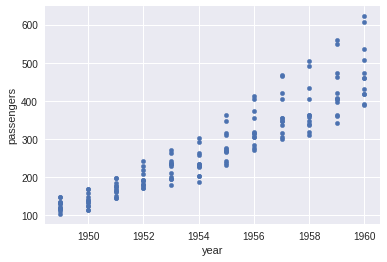

In [70]:

flights.plot.scatter(x= 'year', y='passengers')

### Plot month & passengers

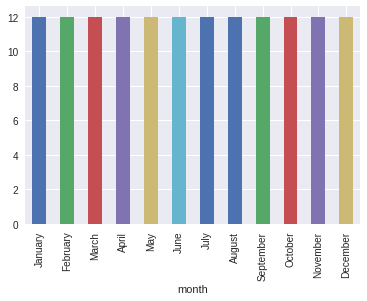

In [94]:
import matplotlib.pyplot as plt
flights_gb2 = flights.groupby('month')['passengers'].count()
flights_gb2
flights_gb2.plot(kind='bar')



In [73]:
flights['month']

0        January
1       February
2          March
3          April
4            May
5           June
6           July
7         August
8      September
9        October
10      November
11      December
12       January
13      February
14         March
15         April
16           May
17          June
18          July
19        August
20     September
21       October
22      November
23      December
24       January
25      February
26         March
27         April
28           May
29          June
         ...    
114         July
115       August
116    September
117      October
118     November
119     December
120      January
121     February
122        March
123        April
124          May
125         June
126         July
127       August
128    September
129      October
130     November
131     December
132      January
133     February
134        March
135        April
136          May
137         June
138         July
139       August
140    September
141      Octob

In [65]:
flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [60]:
plt.hist(flights['month']).count

KeyError: ignored

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [0]:
flights = flights.pivot_table(index='year', columns='month', values='passengers')


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

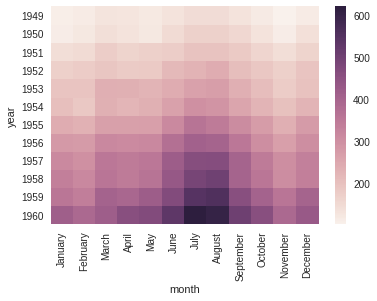

In [49]:
sns.heatmap(flights);

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
import pandas as pd
df2 = pd.read_csv('heart.csv')

In [30]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [32]:
source = df2

bar = alt.Chart(source).mark_bar().encode(
    x='age:O',
    y='chol:Q'
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(chol):Q'
)

(bar + rule).properties(width=600)

LayerChart({
  layer: [Chart({
    data:      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
    0     63    1   3       145   233    1        0      150      0      2.3   
    1     37    1   2       130   250    0        1      187      0      3.5   
    2     41    0   1       130   204    0        0      172      0      1.4   
    3     56    1   1       120   236    0        1      178      0      0.8   
    4     57    0   0       120   354    0        1      163      1      0.6   
    5     57    1   0       140   192    0        1      148      0      0.4   
    6     56    0   1       140   294    0        0      153      0      1.3   
    7     44    1   1       120   263    0        1      173      0      0.0   
    8     52    1   2       172   199    1        1      162      0      0.5   
    9     57    1   2       150   168    0        1      174      0      1.6   
    10    54    1   0       140   239    0        1      160      0      1.2   
    11    48    0   2       130   275    0        1      139      0      0.2   
    12    49    1   1       130   266    0        1      171      0      0.6   
    13    64    1   3       110   211    0        0      144      1      1.8   
    14    58    0   3       150   283    1        0      162      0      1.0   
    15    50    0   2       120   219    0        1      158      0      1.6   
    16    58    0   2       120   340    0        1      172      0      0.0   
    17    66    0   3       150   226    0        1      114      0      2.6   
    18    43    1   0       150   247    0        1      171      0      1.5   
    19    69    0   3       140   239    0        1      151      0      1.8   
    20    59    1   0       135   234    0        1      161      0      0.5   
    21    44    1   2       130   233    0        1      179      1      0.4   
    22    42    1   0       140   226    0        1      178      0      0.0   
    23    61    1   2       150   243    1        1      137      1      1.0   
    24    40    1   3       140   199    0        1      178      1      1.4   
    25    71    0   1       160   302    0        1      162      0      0.4   
    26    59    1   2       150   212    1        1      157      0      1.6   
    27    51    1   2       110   175    0        1      123      0      0.6   
    28    65    0   2       140   417    1        0      157      0      0.8   
    29    53    1   2       130   197    1        0      152      0      1.2   
    ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
    273   58    1   0       100   234    0        1      156      0      0.1   
    274   47    1   0       110   275    0        0      118      1      1.0   
    275   52    1   0       125   212    0        1      168      0      1.0   
    276   58    1   0       146   218    0        1      105      0      2.0   
    277   57    1   1       124   261    0        1      141      0      0.3   
    278   58    0   1       136   319    1        0      152      0      0.0   
    279   61    1   0       138   166    0        0      125      1      3.6   
    280   42    1   0       136   315    0        1      125      1      1.8   
    281   52    1   0       128   204    1        1      156      1      1.0   
    282   59    1   2       126   218    1        1      134      0      2.2   
    283   40    1   0       152   223    0        1      181      0      0.0   
    284   61    1   0       140   207    0        0      138      1      1.9   
    285   46    1   0       140   311    0        1      120      1      1.8   
    286   59    1   3       134   204    0        1      162      0      0.8   
    287   57    1   1       154   232    0        0      164      0      0.0   
    288   57    1   0       110   335    0        1      143      1      3.0   
    289   55    0   0       128   205    0        2      130      1      2.0   
    290   61    1   0       148   203    0 

In [0]:
df2_pd = pd.crosstab(df2['Nationality'], df2['Composure'])

In [20]:
df2_pd.shape

(17194, 48)

In [16]:
df2['Overall'].max()

94

MaxRowsError: ignored

Chart({
  data:        Unnamed: 0      ID                  Name  Age  \
  0               0  158023              L. Messi   31   
  1               1   20801     Cristiano Ronaldo   33   
  2               2  190871             Neymar Jr   26   
  3               3  193080                De Gea   27   
  4               4  192985          K. De Bruyne   27   
  5               5  183277             E. Hazard   27   
  6               6  177003             L. Modrić   32   
  7               7  176580             L. Suárez   31   
  8               8  155862          Sergio Ramos   32   
  9               9  200389              J. Oblak   25   
  10             10  188545        R. Lewandowski   29   
  11             11  182521              T. Kroos   28   
  12             12  182493              D. Godín   32   
  13             13  168542           David Silva   32   
  14             14  215914              N. Kanté   27   
  15             15  211110             P. Dybala   24   


In [0]:
data.wheat()